<a id="setup"></a>
# <p style="background-color: blue; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Cleaning & Transformation</p>

<a id="libraries"></a>
# <b><span style='color:lightblue'> Importing Necessary Libraries</span></b>

In [51]:
import pandas as pd
import numpy as np
import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

<a id="load_dataset"></a>
# <b><span style='color:lightblue'> Load Dataset</span></b>

In [52]:
# Calling get_dataframe function from load_data.py

sys.path.append("..") 

from src.load_data import get_dataframe 

df = get_dataframe()

df.head()

Looking for file at: /Users/maxsmith/2025_data_science_projects/telco_customer_churn/data/raw_original_data.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<a id="setup"></a>
# <p style="background-color: #4893D7; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 | Handling Naming Conventions</p>
<a id="libraries"></a>

In [53]:
# No extra value gained from retaining phone service within 'No phone service' (contained within other features), so will change to No. Need to locate first.

search_values = ['No internet service', 'No phone service']
matching_columns = []

# Create loop
for col in df.columns:
    if df[col].astype(str).isin(search_values).any():
        matching_columns.append(col)

print("Columns containing service flags:", matching_columns)

Columns containing service flags: ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [54]:
# Creating function

def replace_service_values(df, columns, values_to_replace=None, replacement_value='No'):
    if values_to_replace is None:
        values_to_replace = ['No internet service', 'No phone service']

    for col in columns:
        df.loc[:, col] = df[col].replace(values_to_replace, replacement_value)

    return df


In [55]:
# Applying function

matching_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

df = replace_service_values(df, matching_columns)


In [56]:
# Checking they have been replace by calling first loop function
search_values = ['No internet service', 'No phone service']
matching_columns = []

# Create loop
for col in df.columns:
    if df[col].astype(str).isin(search_values).any():
        matching_columns.append(col)

print("Columns containing service flags:", matching_columns)

Columns containing service flags: []


<a id="setup"></a>
# <p style="background-color: #4893D7; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 4 | Handling Missing Values</p>
<a id="libraries"></a>

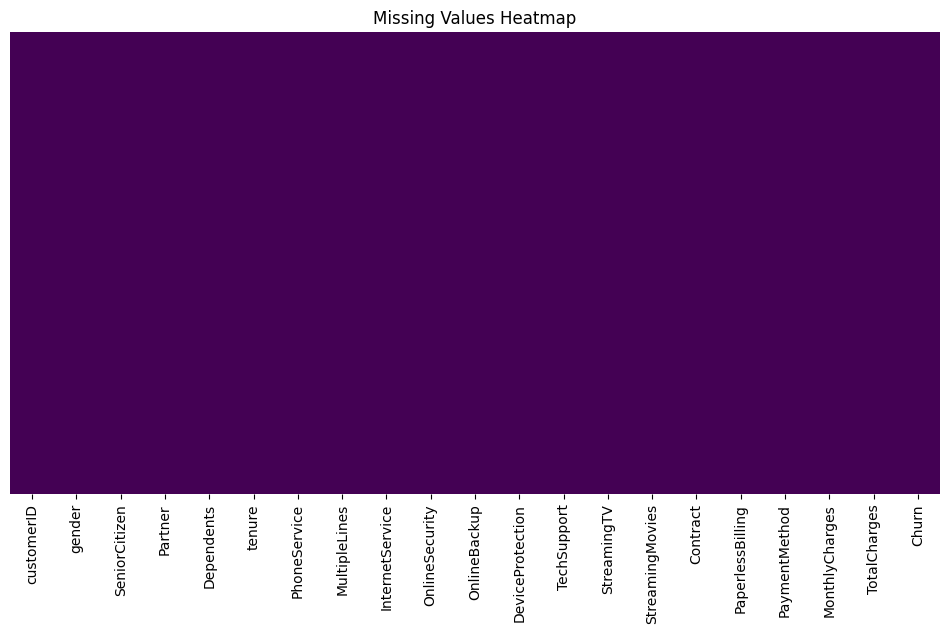

Missing data heatmap saved to ../visualisations/missing_data_heatmap.png
Heatmap saved to: ../visualisations/missing_data_heatmap.png


In [36]:
# Counting missing values for each column

df.isnull().sum()
## Visualising missing values (even though there are none, just showing ma skills and what would conventionally be beneficial

plt.figure(figsize=(12,6))

sns.heatmap(df.isnull(),
            cbar=False,
            cmap='viridis',
            yticklabels=False)

plt.title('Missing Values Heatmap')
plt.show()



# Save plot to the visualizations folder
output_path = os.path.join("..", "visualisations", "missing_data_heatmap.png")
print(f"Missing data heatmap saved to {output_path}")


plt.savefig(output_path, bbox_inches='tight')
plt.close()

print(f"Heatmap saved to: {output_path}")


In [37]:
# Need to investigate TotalCharges column which we found to be a) non-numeric, and b) include 11 missing values

df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [38]:
# Create function to convert to numeric column 

def convert_column_to_numeric(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df


In [39]:
# Apply function

convert_column_to_numeric(df, column_name='TotalCharges')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [40]:
# Confirm function has worked

df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [41]:
# Locate the nulls

empty_rows = df[df['TotalCharges'].isna()]
empty_rows


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [42]:
# Create function to remove missing values

def remove_missing_values(df,column_name):
    df = df[df[column_name].notna()]
    return df

In [43]:
# Removing rows where Total Charges are null
df = remove_missing_values(df,column_name='TotalCharges')

In [44]:
# Confirm no more missing values

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<a id="setup"></a>
# <p style="background-color: #4893D7; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 5 | Handling Duplicates</p>
<a id="libraries"></a>

In [46]:
# Finding duplicate rows and ordering them by customerID
duplicate_rows = df[df.duplicated(keep=False)]

duplicate_rows_sorted = duplicate_rows.sort_values(by=['customerID'])

duplicate_rows_sorted.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
# There are no duplicates (non-normal, again), so no action here